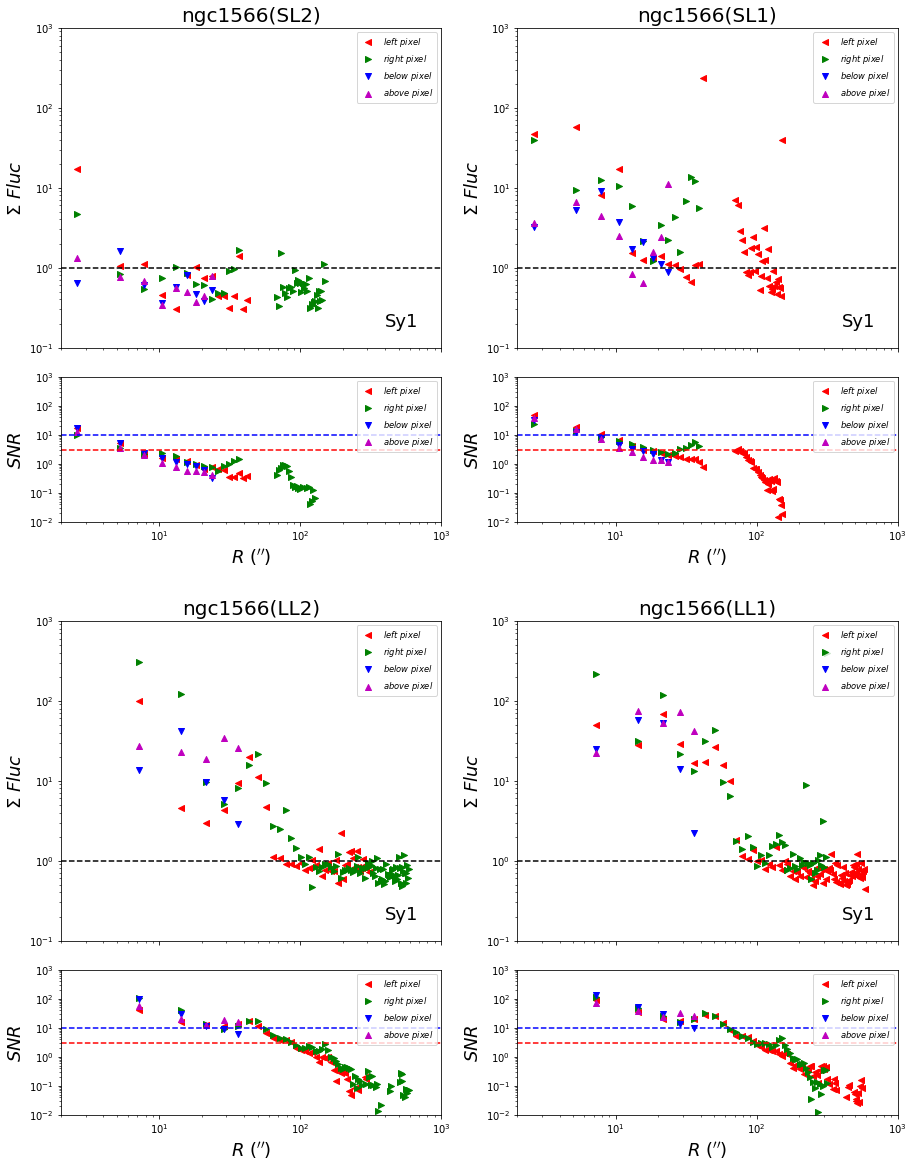

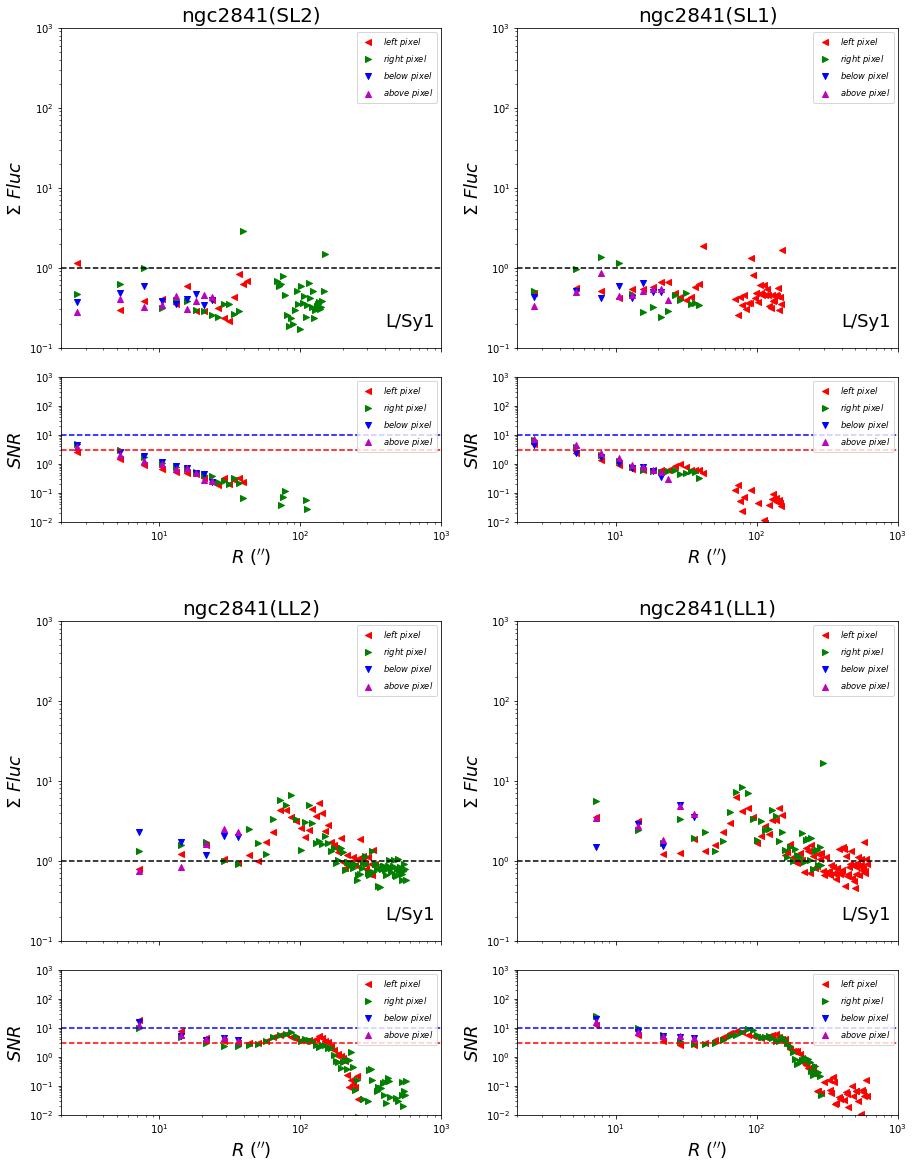

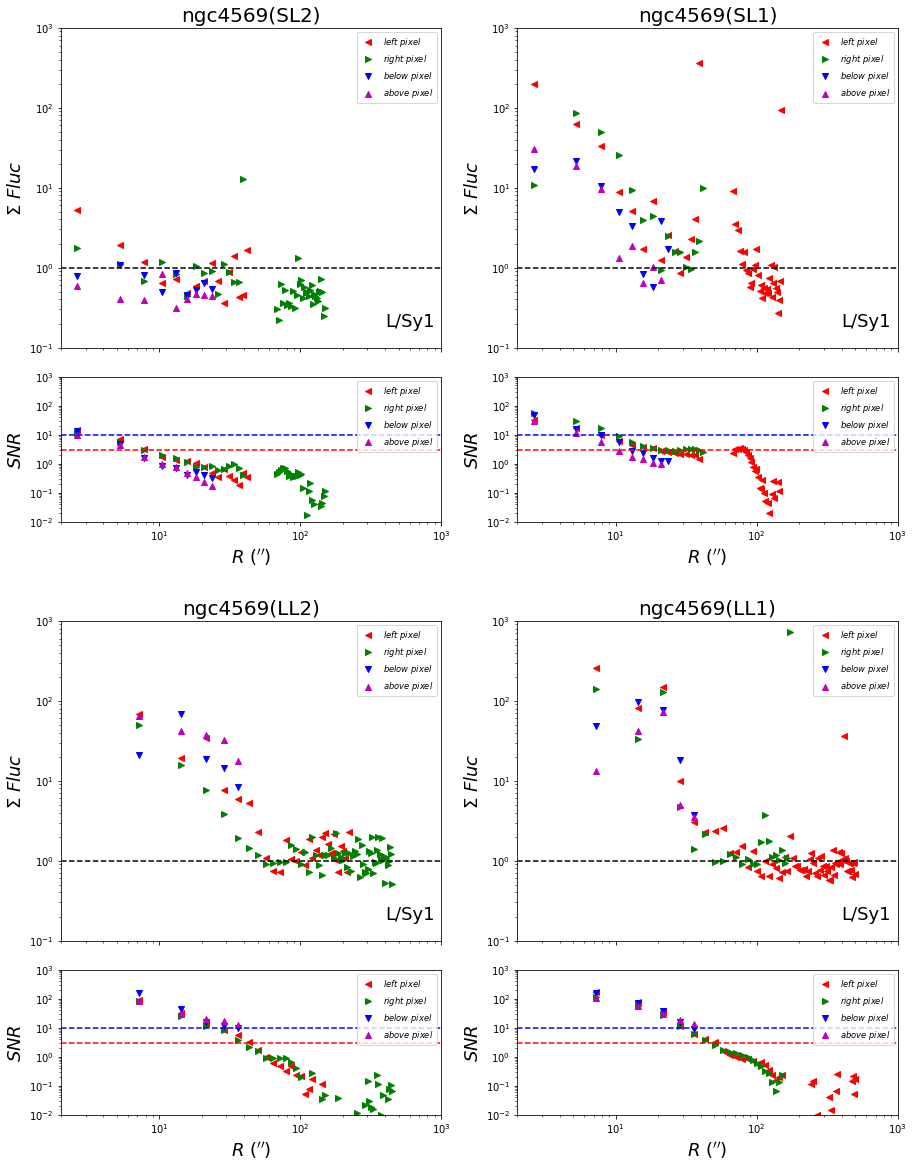

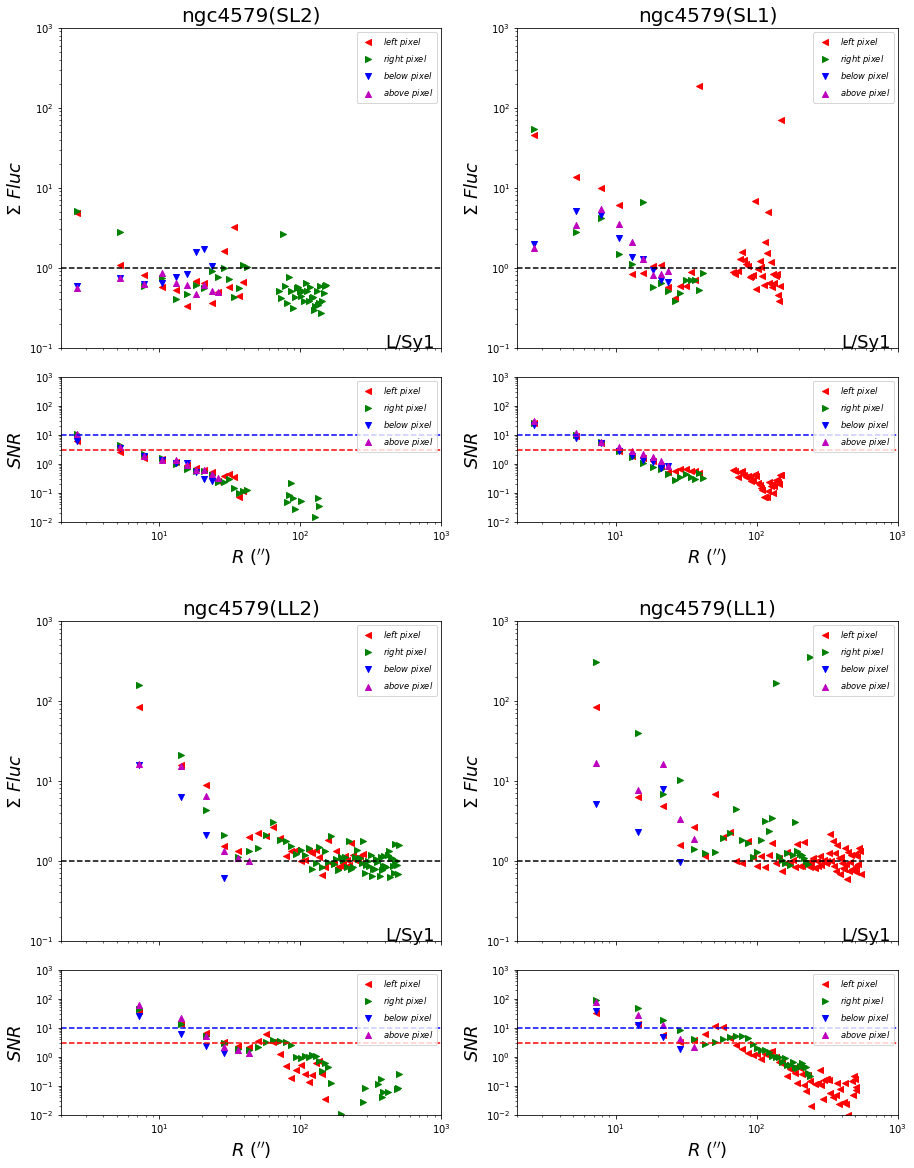

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from astropy.io import fits


data_mode = ['_DR5_SL2_cube','_DR5_SL1_cube','_DR5_LL2_cube','_DR5_LL1_cube']
data_norm = [[6.5, 6.7], [9.2, 9.5], [14.5, 15.2], [23, 24]]
gal_list = open('../subsam_Sy.txt','r')
gal_name = gal_list.readlines()
#gal_name = ['ngc4826', 'ngc4569', 'ngc3351', 'ngc4736']

for name in gal_name:
    f = plt.figure(figsize=[15,20])
    gs0 = gridspec.GridSpec(2, 2)
    for num in range(0,len(data_mode)):
        file_n = '../../Cube/'+name.split('_')[0]+'/'+name.split('_')[0]+data_mode[num].strip()+'.fits'
        file_u = '../../Cube/'+name.split('_')[0]+'/'+name.split('_')[0]+data_mode[num].strip()+'_unc.fits'
        if(os.path.isfile(file_n)):
            cube = fits.open(file_n)
            cube_u = fits.open(file_u)
#            cube.info()

# Re-order FLUX, IVAR, and MASK arrays from (wavelength, DEC, RA) to (RA, DEC, wavelength).
            flux = np.transpose(cube['PRIMARY'].data, axes=(2, 1, 0))
            flux_u = np.transpose(cube_u['PRIMARY'].data, axes=(2, 1, 0))
            flux_sum = flux.sum(axis=2)
            flux_sum[np.isnan(flux_sum)] = 0
            mm = flux_sum.shape
#    nn = np.argmax(flux_sum)
#    xx = (nn)//mm[1]
#    yy = (nn)%mm[1]
            xx, yy = np.where(flux_sum == np.max(flux_sum))
#    print(flux_sum[xx,yy],np.max(flux_sum))
#    print(xx,yy)
   
            wave = cube['WCS-TAB'].data[0][0]
            wave.resize(len(wave))

            flux_header = cube['PRIMARY'].header
    
#    plt.figure(figsize=[10,5])

#            nn = np.min([xx[0], mm[0]-xx[0], yy[0], mm[1]-yy[0]])
#            nn = nn-1
#    print(n)
            mask1 = wave>data_norm[num][0]
            mask2 = wave<data_norm[num][1]
            mask = mask1*mask2
            fmean_c = (flux[xx[0]][yy[0]][mask]).mean()
            flux_max = flux[xx[0]][yy[0]]/fmean_c
            flux_max_u = flux_u[xx[0]][yy[0]]
            fluccc = [[],[],[],[]]
            fluc_u = [[],[],[],[]]
            raddd = [[],[],[],[]]
            for i in range(xx[0]-1,-1,-1):
                flux_row = flux[i][yy[0]]
                if(np.isnan(flux_row).sum()<1):
                    fmean = (flux_row[mask]).mean()
                    flux_row = flux_row/fmean
                    flux_row_u = flux_u[i][yy[0]]
                    fluc = ((flux_row - flux_max)**2/((flux_row_u/fmean)**2 + (flux_max_u/fmean_c)**2))
                    fluccc[0].append(fluc.sum()/len(wave))
                    maskkk = flux_row_u!=0
                    fluc_u[0].append((flux_row[maskkk]*fmean/flux_row_u[maskkk]).mean())
                    raddd[0].append((xx[0]-i)*np.sqrt(flux_header['CDELT1']**2 + flux_header['CDELT2']**2)*3600)

            for i in range(xx[0]+1,mm[0],1):
                flux_row = flux[i][yy[0]]
                if(np.isnan(flux_row).sum()<1):
                    fmean = (flux_row[mask]).mean()
                    flux_row = flux_row/fmean
                    flux_row_u = flux_u[i][yy[0]]
                    fluc = ((flux_row - flux_max)**2/((flux_row_u/fmean)**2 + (flux_max_u/fmean_c)**2))
                    fluccc[1].append(fluc.sum()/len(wave))
                    maskkk = flux_row_u!=0
                    fluc_u[1].append((flux_row[maskkk]*fmean/flux_row_u[maskkk]).mean())
                    raddd[1].append((i-xx[0])*np.sqrt(flux_header['CDELT1']**2 + flux_header['CDELT2']**2)*3600)

            for j in range(yy[0]-1,-1,-1):
                flux_col = flux[xx[0]][j]
                if(np.isnan(flux_col).sum()<1):
                    fmean = (flux_col[mask]).mean()
                    flux_col = flux_col/fmean
                    flux_col_u = flux_u[xx[0]][j]
                    fluc = ((flux_col - flux_max)**2/((flux_col_u/fmean)**2 + (flux_max_u/fmean_c)**2))
                    fluccc[2].append(fluc.sum()/len(wave))
                    maskkk = flux_col_u!=0
                    fluc_u[2].append((flux_col[maskkk]*fmean/flux_col_u[maskkk]).mean())
                    raddd[2].append((yy[0]-j)*np.sqrt(flux_header['CDELT1']**2 + flux_header['CDELT2']**2)*3600)

            for j in range(yy[0]+1,mm[1],1):
                flux_col = flux[xx[0]][j]
                if(np.isnan(flux_col).sum()<1):
                    fmean = (flux_col[mask]).mean()
                    flux_col = flux_col/fmean
                    flux_col_u = flux_u[xx[0]][j]
                    fluc = ((flux_col - flux_max)**2/((flux_col_u/fmean)**2 + (flux_max_u/fmean_c)**2))
                    fluccc[3].append(fluc.sum()/len(wave))
                    maskkk = flux_col_u!=0
                    fluc_u[3].append((flux_col[maskkk]*fmean/flux_col_u[maskkk]).mean())
                    raddd[3].append((j-yy[0])*np.sqrt(flux_header['CDELT1']**2 + flux_header['CDELT2']**2)*3600)

            fluccc = np.array(fluccc)
            fluc_u = np.array(fluc_u)
            raddd = np.array(raddd)

#    for i in range(0,4):
        gs00 = gridspec.GridSpecFromSubplotSpec(3, 3, subplot_spec=gs0[num//2,num%2])

        ax1 = plt.Subplot(f, gs00[:-1, :])
        ax1.scatter(raddd[0], fluccc[0], color='r', marker='<', label='$left\ pixel$')
        ax1.scatter(raddd[1], fluccc[1], color='g', marker='>', label='$right\ pixel$')
        ax1.scatter(raddd[2], fluccc[2], color='b', marker='v', label='$below\ pixel$')    
        ax1.scatter(raddd[3], fluccc[3], color='m', marker='^', label='$above\ pixel$')
        ax1.axhline(1, color='k', ls='--')
        plt.setp(ax1.get_xticklabels(), visible=False)
        f.add_subplot(ax1)
        ax2 = plt.Subplot(f, gs00[-1, :], sharex=ax1)
        ax2.scatter(raddd[0], fluc_u[0], color='r', marker='<', label='$left\ pixel$')
        ax2.scatter(raddd[1], fluc_u[1], color='g', marker='>', label='$right\ pixel$')
        ax2.scatter(raddd[2], fluc_u[2], color='b', marker='v', label='$below\ pixel$')    
        ax2.scatter(raddd[3], fluc_u[3], color='m', marker='^', label='$above\ pixel$')
        ax2.axhline(3, color='r', ls='--')
        ax2.axhline(10, color='b', ls='--')
        f.add_subplot(ax2)
        ax1.set_xscale('log')
        ax1.set_yscale('log')
        ax2.set_xscale('log')
        ax2.set_yscale('log')
        ax1.set_xlim([2,10**3])
        ax1.set_ylim([10**-1,10**3])
#        ax2.set_xlim([2,10**3])
        ax2.set_ylim([10**-2,10**3])
        ax2.set_xlabel('$R\ (\'\')$', fontsize=18)
        ax1.set_ylabel('$\Sigma\ Fluc$', fontsize=18)
        ax2.set_ylabel('$SNR$', fontsize=18)
        ax1.set_title(name.split('_')[0]+'('+data_mode[num].split('_')[2]+')', fontsize=20)
        ax1.text(400, 0.1, name.split('_')[1], fontsize=18)
        ax1.legend(loc=1, fontsize='small')
        ax2.legend(loc=1, fontsize='small')


In [3]:
def wcss(hdu, x, y):
    from astropy import wcs
    CARD = [('NAXIS1',hdu['NAXIS1']),('NAXIS2',hdu['NAXIS2']),('BUNIT',hdu['BUNIT']),('CTYPE1',hdu['CTYPE1']),
             ('CTYPE2',hdu['CTYPE2']),('CRVAL1',hdu['CRVAL1']),('CRVAL2',hdu['CRVAL2']),('CRPIX1',hdu['CRPIX1']),
             ('CRPIX2',hdu['CRPIX2']),('PC1_1',hdu['PC1_1']),('PC1_2',hdu['PC1_2']),('PC2_1',hdu['PC2_1']),
             ('PC2_2',hdu['PC2_2']),('CDELT1',hdu['CDELT1']),('CDELT2',hdu['CDELT2'])]
    hdr = fits.Header(cards= CARD)
    w = wcs.WCS(hdr)
    recx, recy = w.wcs_pix2world(x, y ,0)
    return [recx, recy]

In [4]:
def wcss2(hdu):
    from astropy import wcs
    CARD = [('NAXIS1',hdu['NAXIS1']),('NAXIS2',hdu['NAXIS2']),('BUNIT',hdu['BUNIT']),('CTYPE1',hdu['CTYPE1']),
             ('CTYPE2',hdu['CTYPE2']),('CRVAL1',hdu['CRVAL1']),('CRVAL2',hdu['CRVAL2']),('CRPIX1',hdu['CRPIX1']),
             ('CRPIX2',hdu['CRPIX2']),('PC1_1',hdu['PC1_1']),('PC1_2',hdu['PC1_2']),('PC2_1',hdu['PC2_1']),
             ('PC2_2',hdu['PC2_2']),('CDELT1',hdu['CDELT1']),('CDELT2',hdu['CDELT2'])]
    hdr = fits.Header(cards= CARD)
    w = wcs.WCS(hdr)
    x = hdu['NAXIS1']
    y = hdu['NAXIS2']
    recx, recy = w.wcs_pix2world([1, x, x, 1, 1],[1, 1, y, y, 1],1)
    return [recx, recy]

/usr/local/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: The mpl_toolkits.axes_grid module was deprecated in version 2.1. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist provies the same functionality instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/usr/local/lib/python3.6/site-packages/aplpy/wcs_util.py:515: UserWarning: Pixels are not square, using an average pixel scale
  warnings.warn("Pixels are not square, using an average pixel scale")


16.906746


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


7.8378215
INFO: 
                Inconsistent SIP distortion information is present in the FITS header and the WCS object:
                SIP coefficients were detected, but CTYPE is missing a "-SIP" suffix.
                astropy.wcs is using the SIP distortion coefficients,
                therefore the coordinates calculated here might be incorrect.

                If you do not want to apply the SIP distortion coefficients,
                please remove the SIP coefficients from the FITS header or the
                WCS object.  As an example, if the image is already distortion-corrected
                (e.g., drizzled) then distortion components should not apply and the SIP
                coefficients should be removed.

                While the SIP distortion coefficients are being applied here, if that was indeed the intent,
                for consistency please append "-SIP" to the CTYPE in the FITS header or the WCS object.

                 [astropy.wcs.wcs]


0.5682866


/usr/local/lib/python3.6/site-packages/aplpy/normalize.py:115: RuntimeWarning: invalid value encountered in less
  negative = result < 0.


6.2999077


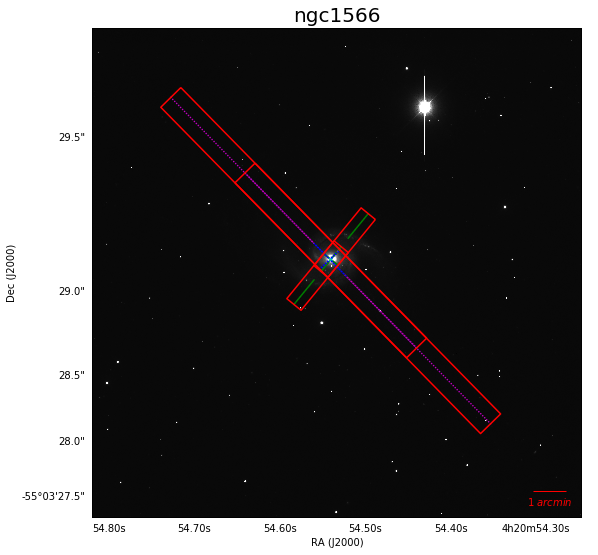

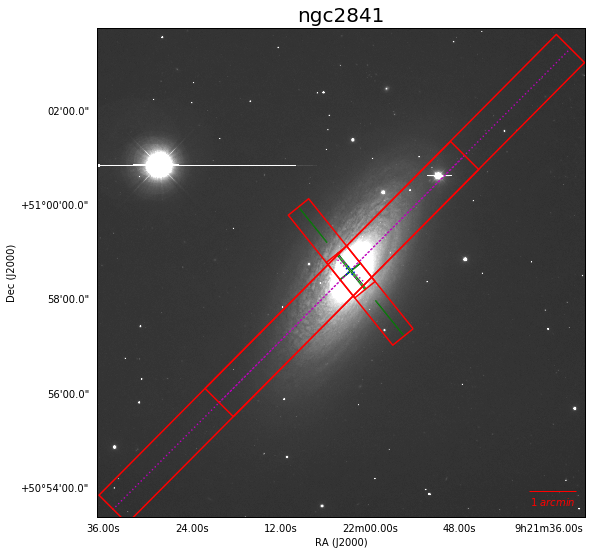

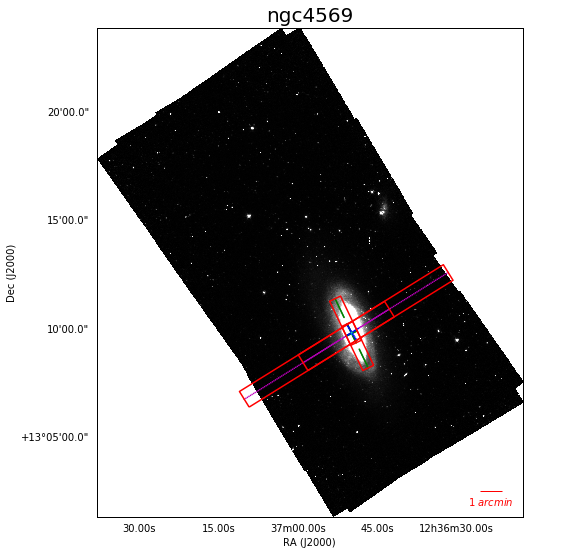

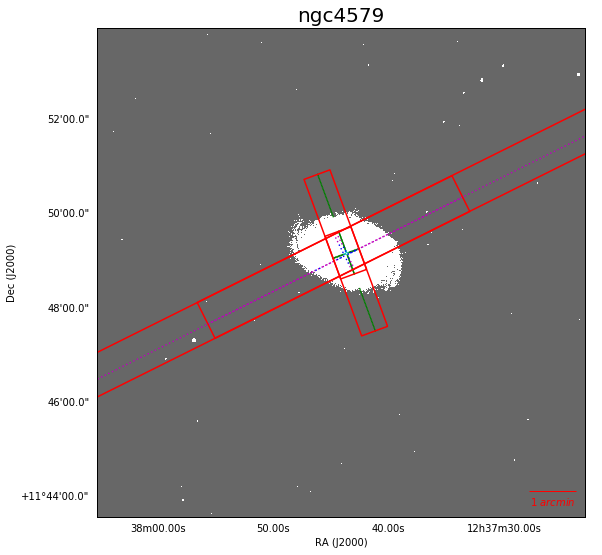

In [5]:
import os
import numpy as np
import aplpy
from astropy import wcs
import matplotlib.pyplot as plt
from astropy.io import fits

gal_list = open('../subsam_Sy.txt','r')
gal_name = gal_list.readlines()
#gallist = ['ngc4826', 'ngc4569', 'ngc3351', 'ngc4736']

for gal in gal_name:
    fig = plt.figure(figsize=[9,9])
    nnaa = '../../Ancillaryimg/'+gal.split('_')[0]
    if(os.path.isfile(nnaa+'_I'+'.fits')):
        img = aplpy.FITSFigure(nnaa+'_I'+'.fits', figure = fig)
        img.add_scalebar(1/60,color='r')
        img.scalebar.set_label('$1\ arcmin$')
    else:
        continue

    nnmm = '../../Cube/'+gal.split('_')[0]+'/'+gal.split('_')[0]
    data_mode = ['_DR5_SL2_cube','_DR5_SL1_cube','_DR5_LL2_cube','_DR5_LL1_cube']
    for mode in data_mode:
        file_n = nnmm + mode.strip()+'.fits'
        file_u = nnmm + mode.strip()+'_unc.fits'
        if(os.path.isfile(file_n)):
            cube = fits.open(file_n)
            cube_u = fits.open(file_u)
        else:
            continue

        flux = np.transpose(cube['PRIMARY'].data, axes=(2, 1, 0))
        flux_u = np.transpose(cube_u['PRIMARY'].data, axes=(2, 1, 0))
        flux_sum = flux.sum(axis=2)
        flux_sum[np.isnan(flux_sum)] = 0
        mm = flux_sum.shape
        xx, yy = np.where(flux_sum == np.max(flux_sum))
        flux_header = cube['PRIMARY'].header

        rec = wcss2(flux_header)
        recx, recy = np.array(rec[0]), np.array(rec[1])
        img.show_lines([np.array([recx,recy])],color='r')

        x = [[[],[]],[[],[]],[[],[]],[[],[]]]
        y = [[[],[]],[[],[]],[[],[]],[[],[]]]
        for i in range(xx[0]-1,-1,-1):
            flux_row = flux[i][yy[0]]
            mask = flux_u[i][yy[0]]!=0
            snr = (flux_row[mask]/flux_u[i][yy[0]][mask]).mean()
            if(np.isnan(flux_row).sum()<1 and snr>10):
                x[0][0].append(i)
                y[0][0].append(yy[0])
            if(np.isnan(flux_row).sum()<1 and snr<10):
                x[0][1].append(i)
                y[0][1].append(yy[0])

        for i in range(xx[0]+1,mm[0],1):
            flux_row = flux[i][yy[0]]
            mask = flux_u[i][yy[0]]!=0
            snr = (flux_row[mask]/flux_u[i][yy[0]][mask]).mean()
            if(np.isnan(flux_row).sum()<1 and snr>10):
                x[1][0].append(i)
                y[1][0].append(yy[0])
            if(np.isnan(flux_row).sum()<1 and snr<10):
                x[1][1].append(i)
                y[1][1].append(yy[0])

        for j in range(yy[0]-1,-1,-1):
            flux_col = flux[xx[0]][j]
            mask = flux_u[xx[0]][j]!=0
            snr = (flux_col[mask]/flux_u[xx[0]][j][mask]).mean()
            if(np.isnan(flux_col).sum()<1 and snr>10):
                x[2][0].append(xx[0])
                y[2][0].append(j)
            if(np.isnan(flux_col).sum()<1 and snr<10):
                x[2][1].append(xx[0])
                y[2][1].append(j)

        for j in range(yy[0]+1,mm[1],1):
            flux_col = flux[xx[0]][j]
            mask = flux_u[xx[0]][j]!=0
            snr = (flux_col[mask]/flux_u[xx[0]][j][mask]).mean()
            if(np.isnan(flux_col).sum()<1 and snr>10):
                x[3][0].append(xx[0])
                y[3][0].append(j)
            if(np.isnan(flux_col).sum()<1 and snr<10):
                x[3][1].append(xx[0])
                y[3][1].append(j)

        if(mode.split('_')[2][0:2]=='SL'):
            if(len(x[0][0])>0):
                rec = wcss(flux_header,x[0][0],y[0][0])
                img.show_markers(rec[0], rec[1], marker='.', facecolor='c', s=10, edgecolor='none')
            if(len(x[0][1])>0):
                rec = wcss(flux_header,x[0][1],y[0][1])
                img.show_markers(rec[0], rec[1], marker='.', facecolor='g', s=10, edgecolor='none')

            if(len(x[1][0])>0):
                rec = wcss(flux_header,x[1][0],y[1][0])
                img.show_markers(rec[0], rec[1], marker='.', facecolor='c', s=10, edgecolor='none')
            if(len(x[1][1])>0):
                rec = wcss(flux_header,x[1][1],y[1][1])
                img.show_markers(rec[0], rec[1], marker='.', facecolor='g', s=10, edgecolor='none')

        
            if(len(x[2][0])>0):
                rec = wcss(flux_header,x[2][0],y[2][0])
                img.show_markers(rec[0], rec[1], marker='.', facecolor='c', s=10, edgecolor='none')
            if(len(x[2][1])>0):
                rec = wcss(flux_header,x[2][1],y[2][1])
                img.show_markers(rec[0], rec[1], marker='.', facecolor='g', s=10, edgecolor='none')

            if(len(x[3][0])>0):
                rec = wcss(flux_header,x[3][0],y[3][0])
                img.show_markers(rec[0], rec[1], marker='.', facecolor='c', s=10, edgecolor='none')
            if(len(x[3][1])>0):
                rec = wcss(flux_header,x[3][1],y[3][1])
                img.show_markers(rec[0], rec[1], marker='.', facecolor='g', s=10, edgecolor='none')

        else:
            if(len(x[0][0])>0):
                rec = wcss(flux_header,x[0][0],y[0][0])
                img.show_markers(rec[0], rec[1], marker='.', facecolor='b', s=10, edgecolor='none')
            if(len(x[0][1])>0):
                rec = wcss(flux_header,x[0][1],y[0][1])
                img.show_markers(rec[0], rec[1], marker='.', facecolor='m', s=10, edgecolor='none')

            if(len(x[1][0])>0):
                rec = wcss(flux_header,x[1][0],y[1][0])
                img.show_markers(rec[0], rec[1], marker='.', facecolor='b', s=10, edgecolor='none')
            if(len(x[1][1])>0):
                rec = wcss(flux_header,x[1][1],y[1][1])
                img.show_markers(rec[0], rec[1], marker='.', facecolor='m', s=10, edgecolor='none')

            if(len(x[2][0])>0):
                rec = wcss(flux_header,x[2][0],y[2][0])
                img.show_markers(rec[0], rec[1], marker='.', facecolor='b', s=10, edgecolor='none')
            if(len(x[2][1])>0):
                rec = wcss(flux_header,x[2][1],y[2][1])
                img.show_markers(rec[0], rec[1], marker='.', facecolor='m', s=10, edgecolor='none')

            if(len(x[3][0])>0):
                rec = wcss(flux_header,x[3][0],y[3][0])
                img.show_markers(rec[0], rec[1], marker='.', facecolor='b', s=10, edgecolor='none')
            if(len(x[3][1])>0):
                rec = wcss(flux_header,x[3][1],y[3][1])
                img.show_markers(rec[0], rec[1], marker='.', facecolor='m', s=10, edgecolor='none')
#    img.add_label(recx.mean(),recy.mean(),mode.split('_')[2], color = 'y')
    img.set_title(gal.split('_')[0],fontsize=20)

    data = fits.open(nnaa+'_I'+'.fits')[0].data
    data[np.isnan(data)] = 0
    data.sort()
    vmax = data[:,-1]
    vmax.sort()
    mask = vmax<3*vmax[:-10].mean()
    vv = vmax[mask].mean()
    print(vv)
    img.show_grayscale(stretch='power', vmin=0, vmax=vv)

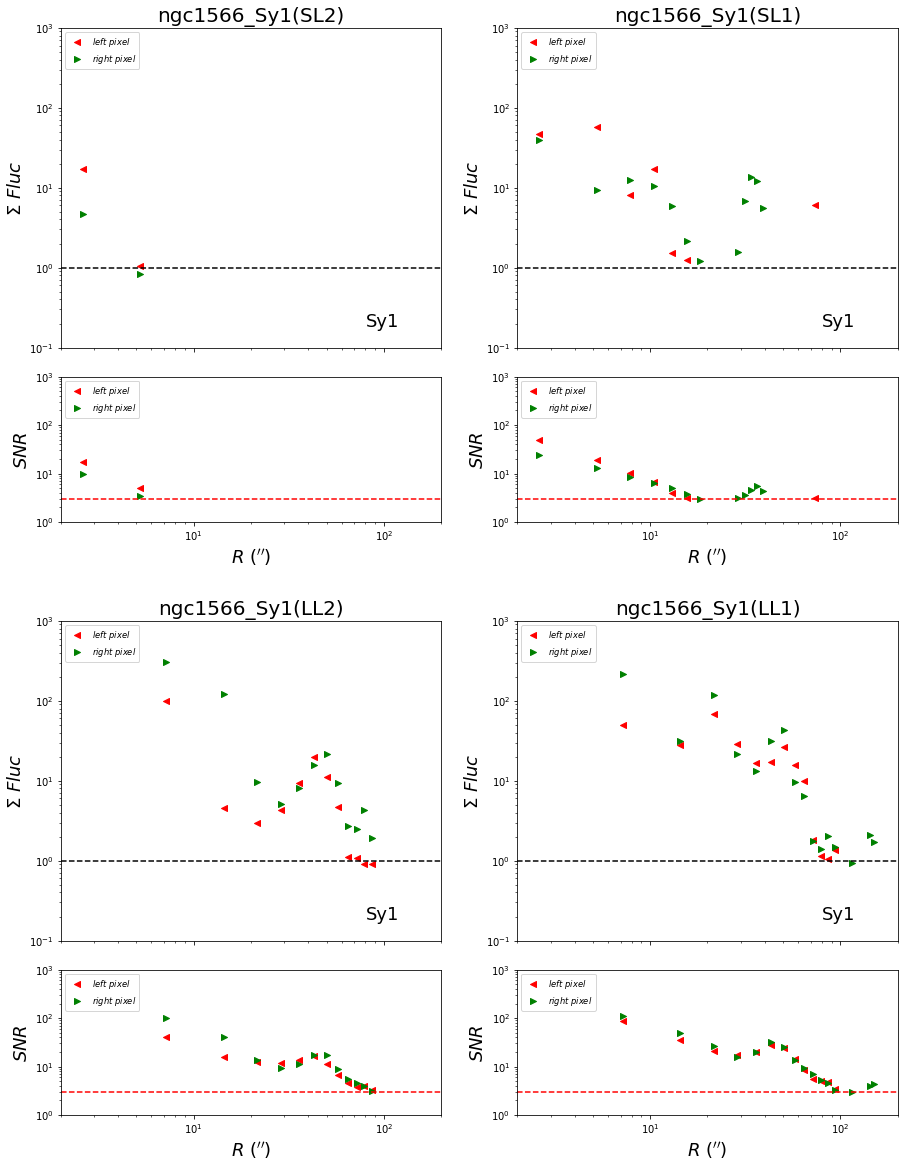

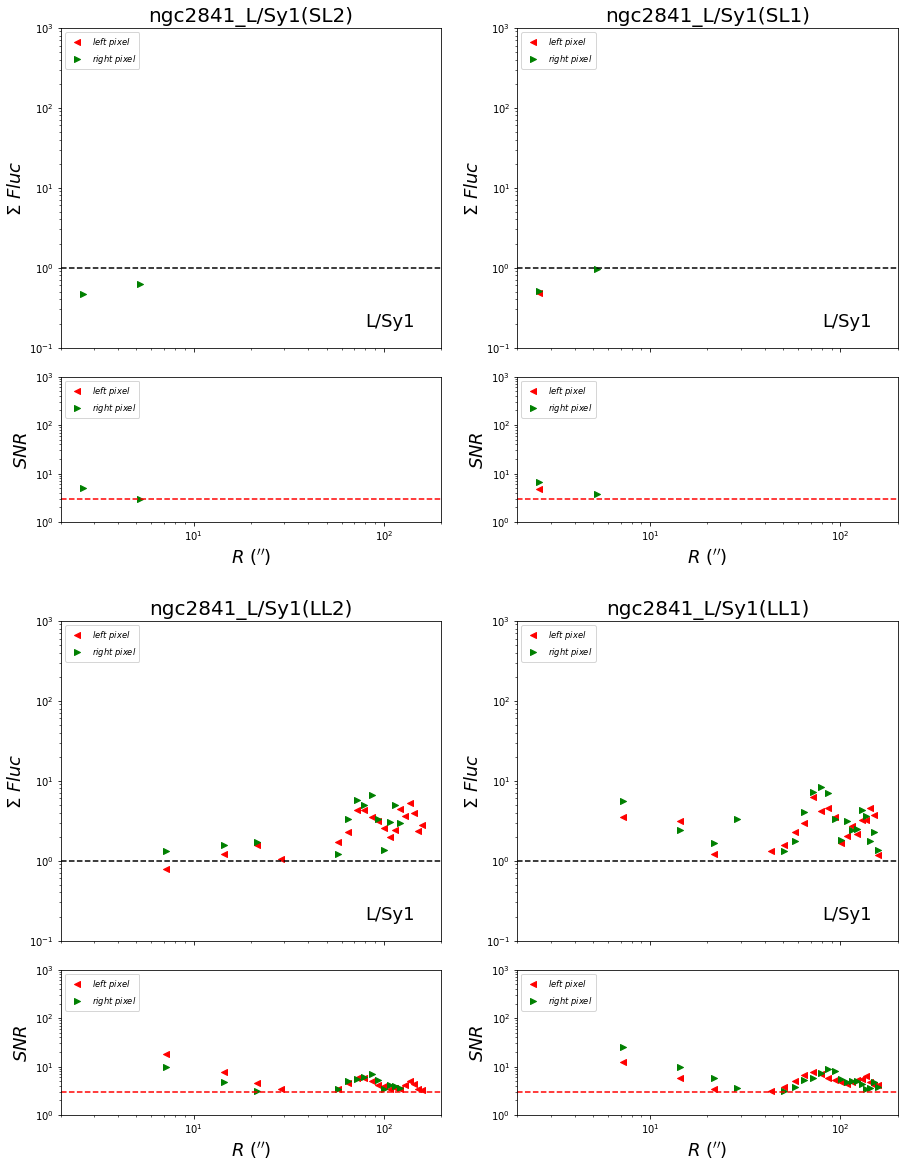

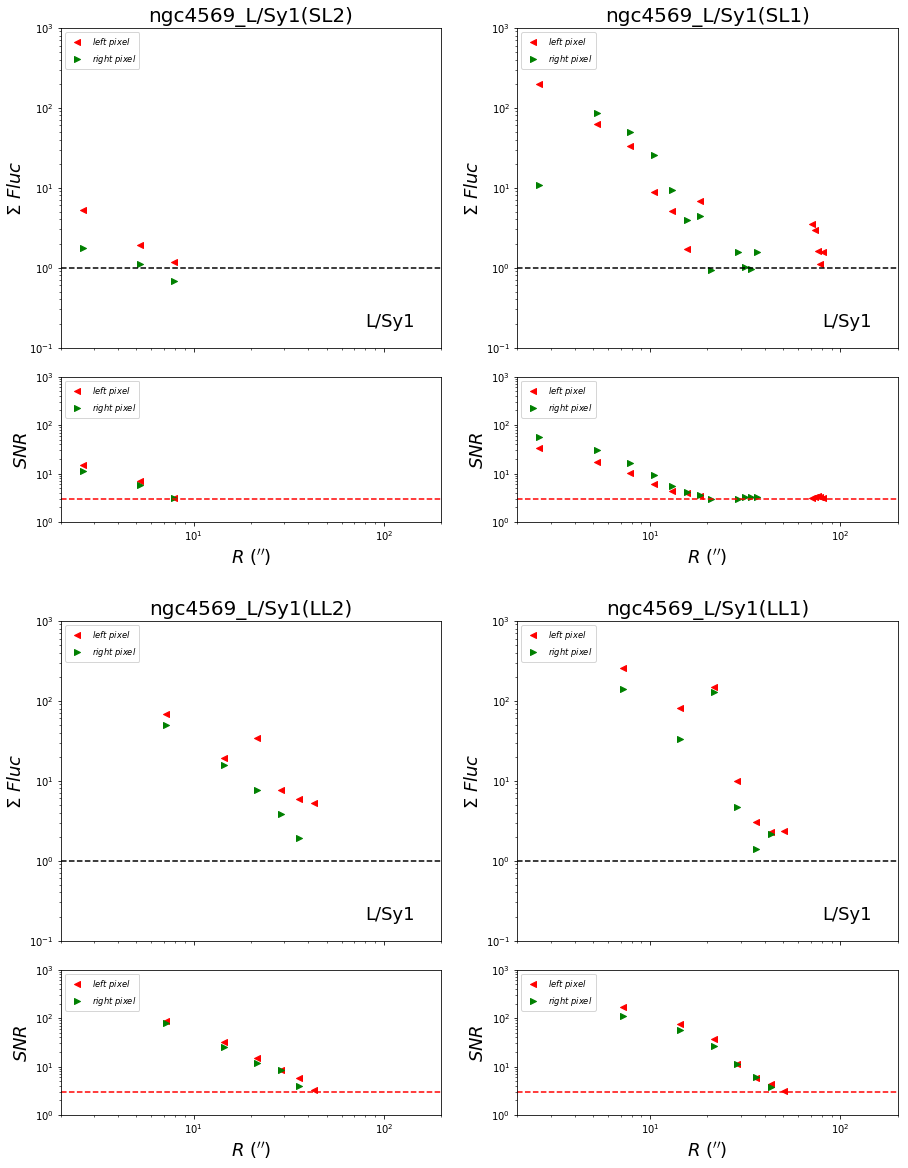

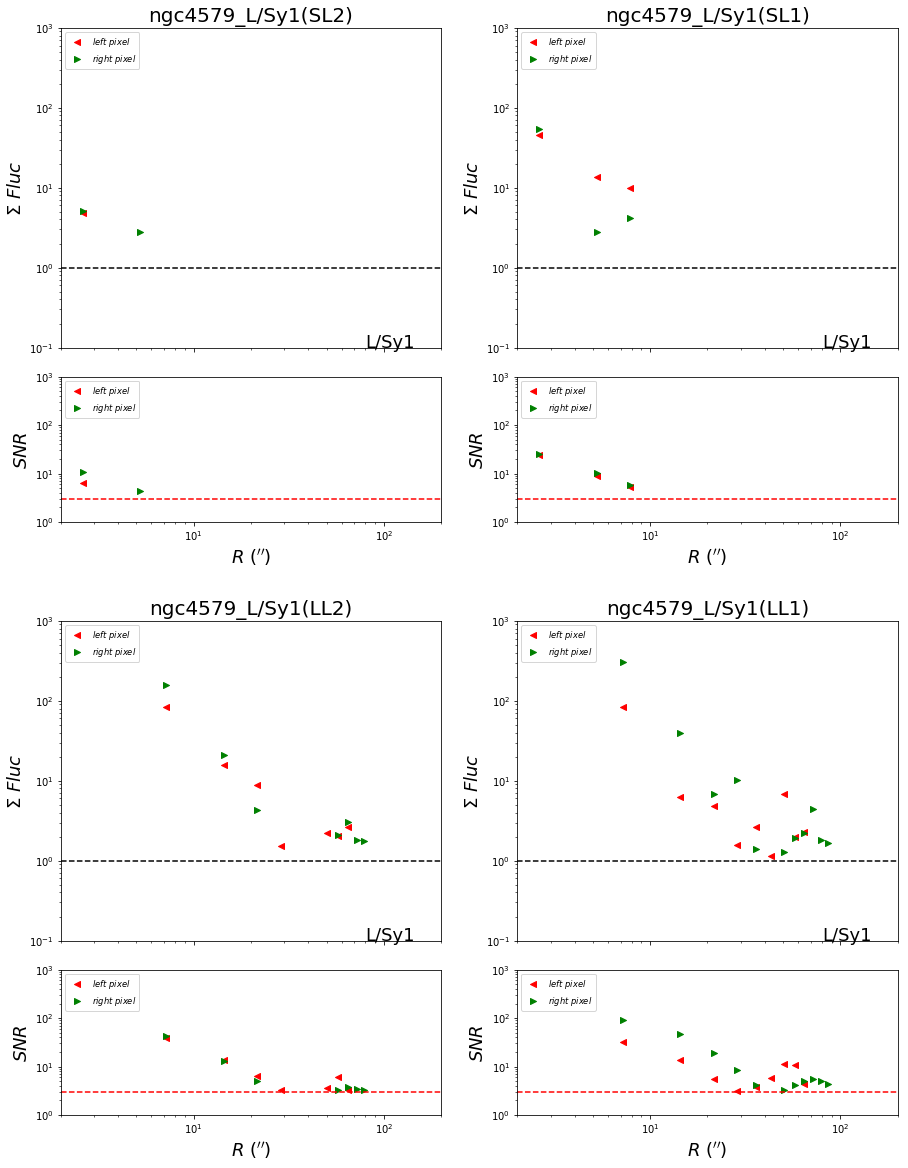

In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from astropy.io import fits


data_mode = ['_DR5_SL2_cube','_DR5_SL1_cube','_DR5_LL2_cube','_DR5_LL1_cube']
data_norm = [[6.5, 6.7], [9.2, 9.5], [14.5, 15.2], [23, 24]]
gal_list = open('../subsam_Sy.txt','r')
gal_name = gal_list.readlines()
#gal_name = ['ngc4826', 'ngc4569', 'ngc3351', 'ngc4736']

for name in gal_name:
    f = plt.figure(figsize=[15,20])
    gs0 = gridspec.GridSpec(2, 2)
    for num in range(0,len(data_mode)):
        file_n = '../../Cube/'+name.split('_')[0]+'/'+name.split('_')[0]+data_mode[num].strip()+'.fits'
        file_u = '../../Cube/'+name.split('_')[0]+'/'+name.split('_')[0]+data_mode[num].strip()+'_unc.fits'
        if(os.path.isfile(file_n)):
            cube = fits.open(file_n)
            cube_u = fits.open(file_u)
#            cube.info()

# Re-order FLUX, IVAR, and MASK arrays from (wavelength, DEC, RA) to (RA, DEC, wavelength).
            flux = np.transpose(cube['PRIMARY'].data, axes=(2, 1, 0))
            flux_u = np.transpose(cube_u['PRIMARY'].data, axes=(2, 1, 0))
            flux_sum = flux.sum(axis=2)
            flux_sum[np.isnan(flux_sum)] = 0
            mm = flux_sum.shape
#    nn = np.argmax(flux_sum)
#    xx = (nn)//mm[1]
#    yy = (nn)%mm[1]
            xx, yy = np.where(flux_sum == np.max(flux_sum))
#    print(flux_sum[xx,yy],np.max(flux_sum))
#    print(xx,yy)
   
            wave = cube['WCS-TAB'].data[0][0]
            wave.resize(len(wave))

            flux_header = cube['PRIMARY'].header
    
#    plt.figure(figsize=[10,5])

#            nn = np.min([xx[0], mm[0]-xx[0], yy[0], mm[1]-yy[0]])
#            nn = nn-1
#    print(n)
            mask1 = wave>data_norm[num][0]
            mask2 = wave<data_norm[num][1]
            mask = mask1*mask2
            fmean_c = (flux[xx[0]][yy[0]][mask]).mean()
            flux_max = flux[xx[0]][yy[0]]/fmean_c
            flux_max_u = flux_u[xx[0]][yy[0]]
            fluccc = [[],[],[],[]]
            fluc_u = [[],[],[],[]]
            raddd = [[],[],[],[]]
            for i in range(xx[0]-1,-1,-1):
                flux_row = flux[i][yy[0]]
                masss = flux_u[i][yy[0]]!=0
                snr = (flux_row[masss]/flux_u[i][yy[0]][masss]).mean()
                if(np.isnan(flux_row).sum()<1 and snr>3):
                    fmean = (flux_row[mask]).mean()
                    flux_row = flux_row/fmean
                    flux_row_u = flux_u[i][yy[0]]
                    fluc = ((flux_row - flux_max)**2/((flux_row_u/fmean)**2 + (flux_max_u/fmean_c)**2))
                    fluccc[0].append(fluc.sum()/len(wave))
                    fluc_u[0].append(snr)
                    raddd[0].append((xx[0]-i)*np.sqrt(flux_header['CDELT1']**2 + flux_header['CDELT2']**2)*3600)

            for i in range(xx[0]+1,mm[0],1):
                flux_row = flux[i][yy[0]]
                masss = flux_u[i][yy[0]]!=0
                snr = (flux_row[masss]/flux_u[i][yy[0]][masss]).mean()
                if(np.isnan(flux_row).sum()<1 and snr>3):
                    fmean = (flux_row[mask]).mean()
                    flux_row = flux_row/fmean
                    flux_row_u = flux_u[i][yy[0]]
                    fluc = ((flux_row - flux_max)**2/((flux_row_u/fmean)**2 + (flux_max_u/fmean_c)**2))
                    fluccc[1].append(fluc.sum()/len(wave))
                    fluc_u[1].append(snr)
                    raddd[1].append((i-xx[0])*np.sqrt(flux_header['CDELT1']**2 + flux_header['CDELT2']**2)*3600)

            for j in range(yy[0]-1,-1,-1):
                flux_col = flux[xx[0]][j]
                masss = flux_u[xx[0]][j]!=0
                snr = (flux_col[masss]/flux_u[xx[0]][j][masss]).mean()
                if(np.isnan(flux_col).sum()<1 and snr>3):
                    fmean = (flux_col[mask]).mean()
                    flux_col = flux_col/fmean
                    flux_col_u = flux_u[xx[0]][j]
                    fluc = ((flux_col - flux_max)**2/((flux_col_u/fmean)**2 + (flux_max_u/fmean_c)**2))
                    fluccc[2].append(fluc.sum()/len(wave))
                    fluc_u[2].append(snr)
                    raddd[2].append((yy[0]-j)*np.sqrt(flux_header['CDELT1']**2 + flux_header['CDELT2']**2)*3600)

            for j in range(yy[0]+1,mm[1],1):
                flux_col = flux[xx[0]][j]
                masss = flux_u[xx[0]][j]!=0
                snr = (flux_col[masss]/flux_u[xx[0]][j][masss]).mean()
                if(np.isnan(flux_col).sum()<1 and snr>3):
                    fmean = (flux_col[mask]).mean()
                    flux_col = flux_col/fmean
                    flux_col_u = flux_u[xx[0]][j]
                    fluc = ((flux_col - flux_max)**2/((flux_col_u/fmean)**2 + (flux_max_u/fmean_c)**2))
                    fluccc[3].append(fluc.sum()/len(wave))
                    fluc_u[3].append(snr)
                    raddd[3].append((j-yy[0])*np.sqrt(flux_header['CDELT1']**2 + flux_header['CDELT2']**2)*3600)

            fluccc = np.array(fluccc)
            fluc_u = np.array(fluc_u)
            raddd = np.array(raddd)

#    for i in range(0,4):
        gs00 = gridspec.GridSpecFromSubplotSpec(3, 3, subplot_spec=gs0[num//2,num%2])

        ax1 = plt.Subplot(f, gs00[:-1, :])
        ax1.scatter(raddd[0], fluccc[0], color='r', marker='<', label='$left\ pixel$')
        ax1.scatter(raddd[1], fluccc[1], color='g', marker='>', label='$right\ pixel$')
#        ax1.scatter(raddd[2], fluccc[2], color='b', marker='v', label='$below\ pixel$')    
#        ax1.scatter(raddd[3], fluccc[3], color='m', marker='^', label='$above\ pixel$')
        ax1.axhline(1, color='k', ls='--')
        plt.setp(ax1.get_xticklabels(), visible=False)
        f.add_subplot(ax1)
        ax2 = plt.Subplot(f, gs00[-1, :], sharex=ax1)
        ax2.scatter(raddd[0], fluc_u[0], color='r', marker='<', label='$left\ pixel$')
        ax2.scatter(raddd[1], fluc_u[1], color='g', marker='>', label='$right\ pixel$')
#        ax2.scatter(raddd[2], fluc_u[2], color='b', marker='v', label='$below\ pixel$')    
#        ax2.scatter(raddd[3], fluc_u[3], color='m', marker='^', label='$above\ pixel$')
        ax2.axhline(3, color='r', ls='--')
#        ax2.axhline(10, color='b', ls='--')
        f.add_subplot(ax2)
        ax1.set_xscale('log')
        ax1.set_yscale('log')
        ax2.set_xscale('log')
        ax2.set_yscale('log')
        ax1.set_xlim([2,2*10**2])
#        ax2.set_xlim([2,2*10**2])
        ax1.set_ylim([10**-1,10**3])
        ax2.set_ylim([1,10**3])
        ax2.set_xlabel('$R\ (\'\')$', fontsize=18)
        ax1.set_ylabel('$\Sigma\ Fluc$', fontsize=18)
        ax2.set_ylabel('$SNR$', fontsize=18)
        ax1.set_title(name.strip()+'('+data_mode[num].split('_')[2]+')', fontsize=20)
        ax1.text(80, 0.1, name.split('_')[1], fontsize=18)
        ax1.legend(loc=2, fontsize='small')
        ax2.legend(loc=2, fontsize='small')


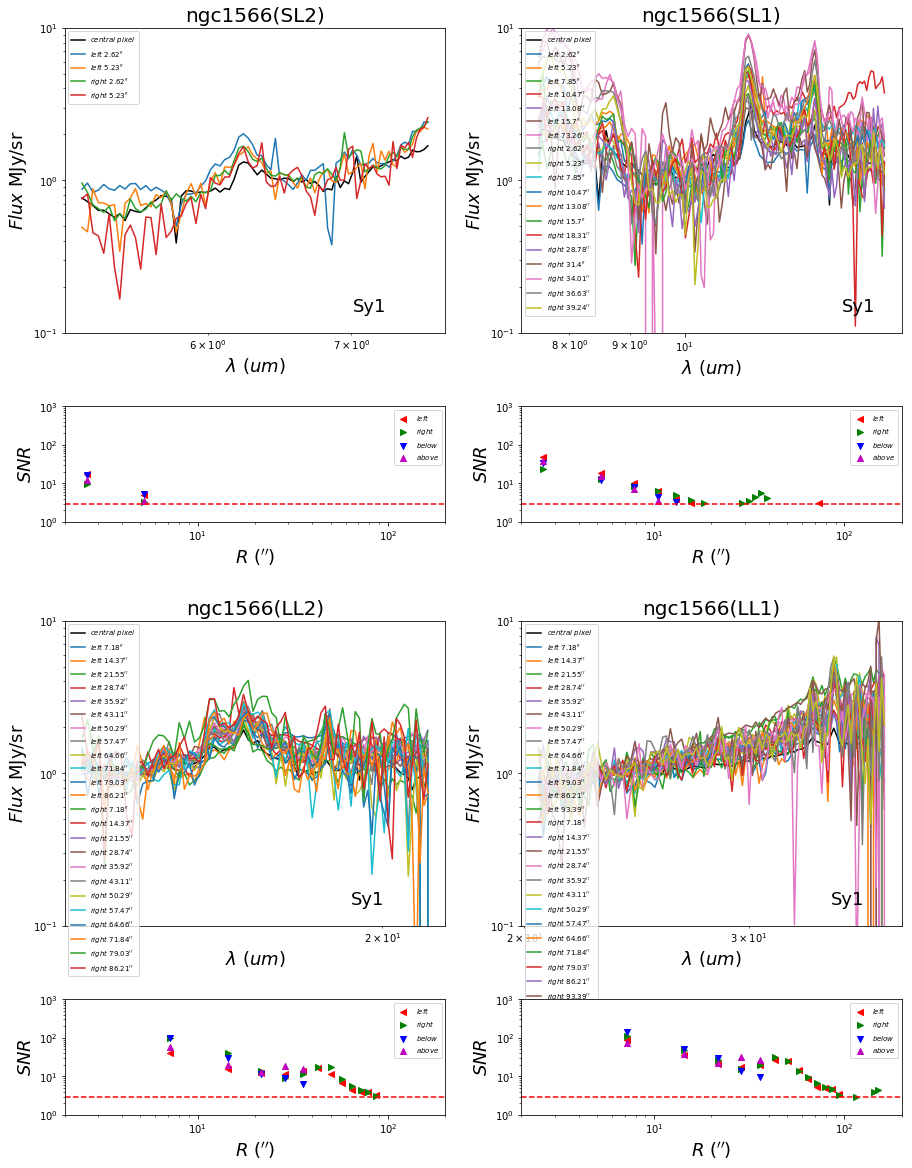

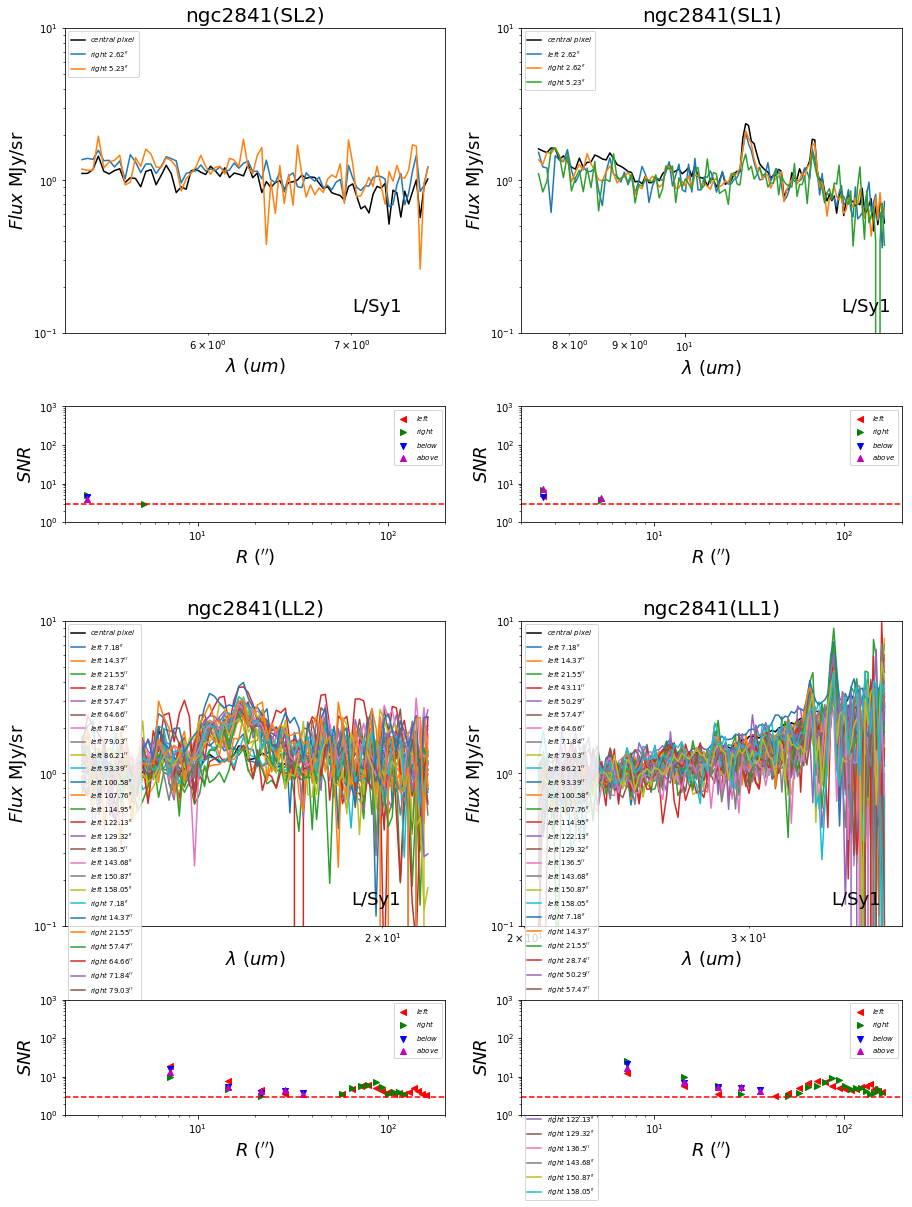

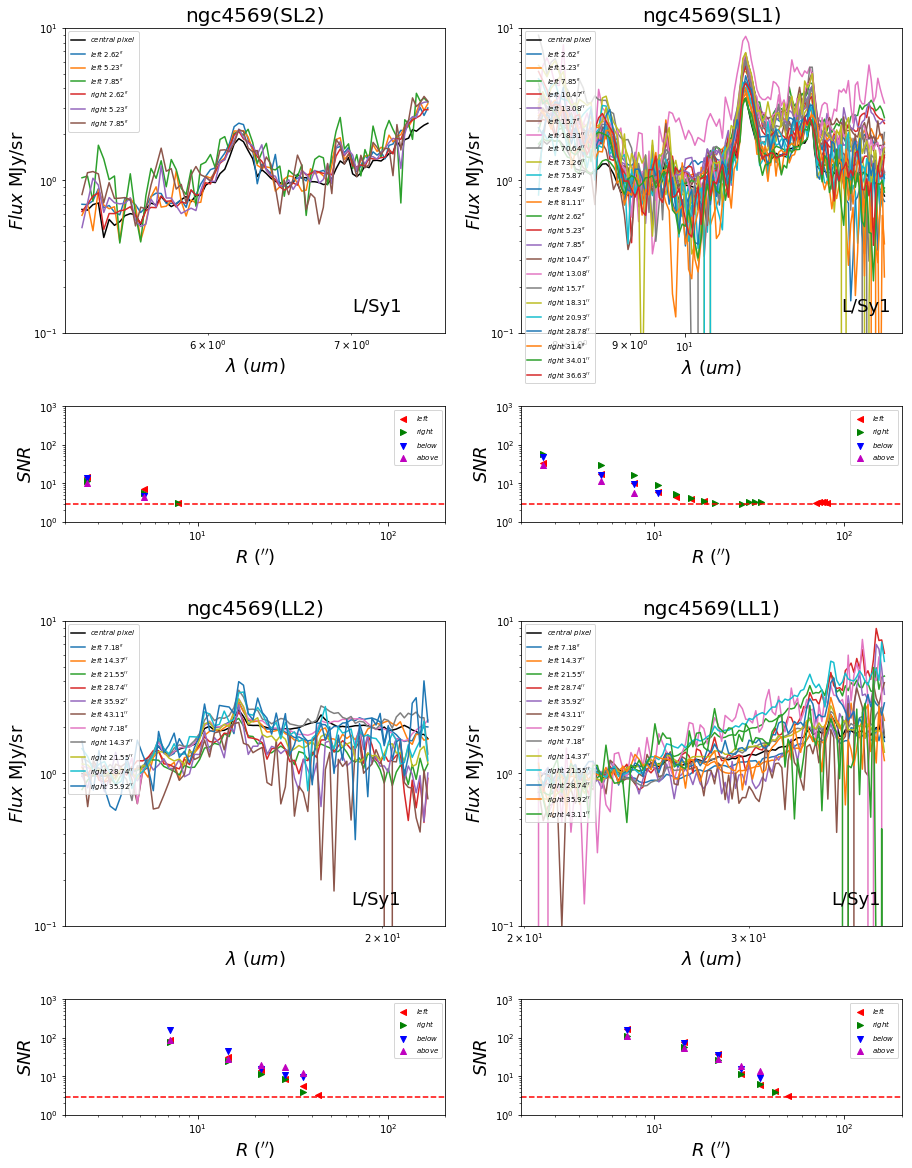

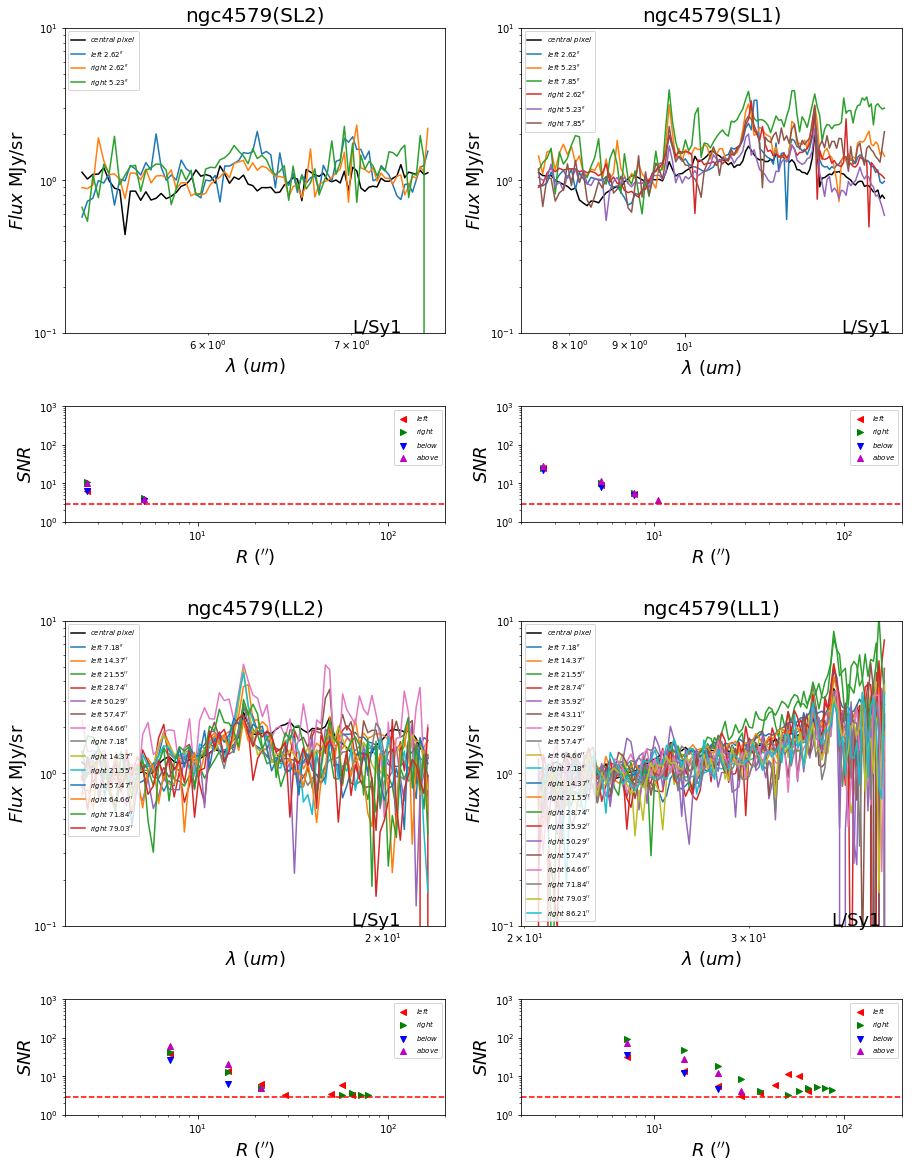

In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from astropy.io import fits


data_mode = ['_DR5_SL2_cube','_DR5_SL1_cube','_DR5_LL2_cube','_DR5_LL1_cube']
data_norm = [[6.5, 6.7], [9.2, 9.5], [14.5, 15.2], [23, 24]]
gal_list = open('../subsam_Sy.txt','r')
gal_name = gal_list.readlines()
#gal_name = ['ngc4826', 'ngc4569', 'ngc3351', 'ngc4736']

for name in gal_name:
    f = plt.figure(figsize=[15,20])
    gs0 = gridspec.GridSpec(2, 2)
    for num in range(0,len(data_mode)):

        gs00 = gridspec.GridSpecFromSubplotSpec(8, 3, subplot_spec=gs0[num//2,num%2])

        file_n = '../../Cube/'+name.split('_')[0]+'/'+name.split('_')[0]+data_mode[num].strip()+'.fits'
        file_u = '../../Cube/'+name.split('_')[0]+'/'+name.split('_')[0]+data_mode[num].strip()+'_unc.fits'
        if(os.path.isfile(file_n)):
            cube = fits.open(file_n)
            cube_u = fits.open(file_u)
#            cube.info()

# Re-order FLUX, IVAR, and MASK arrays from (wavelength, DEC, RA) to (RA, DEC, wavelength).
            flux = np.transpose(cube['PRIMARY'].data, axes=(2, 1, 0))
            flux_u = np.transpose(cube_u['PRIMARY'].data, axes=(2, 1, 0))
            flux_sum = flux.sum(axis=2)
            flux_sum[np.isnan(flux_sum)] = 0
            mm = flux_sum.shape
#    nn = np.argmax(flux_sum)
#    xx = (nn)//mm[1]
#    yy = (nn)%mm[1]
            xx, yy = np.where(flux_sum == np.max(flux_sum))
#    print(flux_sum[xx,yy],np.max(flux_sum))
#    print(xx,yy)
   
            wave = cube['WCS-TAB'].data[0][0]
            wave.resize(len(wave))

            flux_header = cube['PRIMARY'].header
    
#    plt.figure(figsize=[10,5])

#            nn = np.min([xx[0], mm[0]-xx[0], yy[0], mm[1]-yy[0]])
#            nn = nn-1
#    print(n)
            mask1 = wave>data_norm[num][0]
            mask2 = wave<data_norm[num][1]
            mask = mask1*mask2
            fmean_c = (flux[xx[0]][yy[0]][mask]).mean()
            flux_max = flux[xx[0]][yy[0]]/fmean_c
            flux_max_u = flux_u[xx[0]][yy[0]]

            ax1 = plt.Subplot(f, gs00[:-3, :])
            ax1.plot(wave, flux_max, 'k', label='$central\ pixel$')
            fluc_u = [[],[],[],[]]
            raddd = [[],[],[],[]]
            
            for i in range(xx[0]-1,-1,-1):
                flux_row = flux[i][yy[0]]
                masss = flux_u[i][yy[0]]!=0
                snr = (flux_row[masss]/flux_u[i][yy[0]][masss]).mean()
                if(np.isnan(flux_row).sum()<1 and snr>3):
                    fmean = (flux_row[mask]).mean()
                    flux_row = flux_row/fmean
                    par = (xx[0]-i)*np.sqrt(flux_header['CDELT1']**2 + flux_header['CDELT2']**2)*3600
                    ax1.plot(wave, flux_row, label='$left\ $'+str(round(par,2))+'$\'\'$')
                    fluc_u[0].append(snr)
                    raddd[0].append(par)

            for i in range(xx[0]+1,mm[0],1):
                flux_row = flux[i][yy[0]]
                masss = flux_u[i][yy[0]]!=0
                snr = (flux_row[masss]/flux_u[i][yy[0]][masss]).mean()
                if(np.isnan(flux_row).sum()<1 and snr>3):
                    fmean = (flux_row[mask]).mean()
                    flux_row = flux_row/fmean
                    par = (i-xx[0])*np.sqrt(flux_header['CDELT1']**2 + flux_header['CDELT2']**2)*3600
                    ax1.plot(wave, flux_row, label='$right\ $'+str(round(par,2))+'$\'\'$')
                    fluc_u[1].append(snr)
                    raddd[1].append(par)

            for j in range(yy[0]-1,-1,-1):
                flux_col = flux[xx[0]][j]
                masss = flux_u[xx[0]][j]!=0
                snr = (flux_col[masss]/flux_u[xx[0]][j][masss]).mean()
                if(np.isnan(flux_col).sum()<1 and snr>3):
                    fmean = (flux_col[mask]).mean()
                    flux_col = flux_col/fmean
                    par = (yy[0]-j)*np.sqrt(flux_header['CDELT1']**2 + flux_header['CDELT2']**2)*3600
#                    ax1.plot(wave, flux_col, label='$below\ $'+str(round(par,2))+'$\'\'$')
                    fluc_u[2].append(snr)
                    raddd[2].append(par)

            for j in range(yy[0]+1,mm[1],1):
                flux_col = flux[xx[0]][j]
                masss = flux_u[xx[0]][j]!=0
                snr = (flux_col[masss]/flux_u[xx[0]][j][masss]).mean()
                if(np.isnan(flux_col).sum()<1 and snr>3):
                    fmean = (flux_col[mask]).mean()
                    flux_col = flux_col/fmean
                    par = (j-yy[0])*np.sqrt(flux_header['CDELT1']**2 + flux_header['CDELT2']**2)*3600
#                    ax1.plot(wave, flux_col, label='$above\ $'+str(round(par,2))+'$\'\'$')
                    fluc_u[3].append(snr)
                    raddd[3].append(par)

            fluc_u = np.array(fluc_u)
            raddd = np.array(raddd)
#            plt.setp(ax1.get_xticklabels(), visible=False)
            f.add_subplot(ax1)

#    for i in range(0,4):

        ax2 = plt.Subplot(f, gs00[-2:, :])#, sharex=ax1)
        ax2.scatter(raddd[0], fluc_u[0], color='r', marker='<', label='$left$')
        ax2.scatter(raddd[1], fluc_u[1], color='g', marker='>', label='$right$')
        ax2.scatter(raddd[2], fluc_u[2], color='b', marker='v', label='$below$')    
        ax2.scatter(raddd[3], fluc_u[3], color='m', marker='^', label='$above$')
        ax2.axhline(3, color='r', ls='--')
#        ax2.axhline(10, color='b', ls='--')
        f.add_subplot(ax2)
        ax1.set_xscale('log')
        ax1.set_yscale('log')
        ax2.set_xscale('log')
        ax2.set_yscale('log')
#        ax1.set_xlim([5*10**0,5*10**1])
        ax1.set_ylim([10**-1,10**1])
        ax2.set_xlim([2,2*10**2])
        ax2.set_ylim([1,10**3])
        ax1.set_xlabel('$\lambda\ (um)$', fontsize=18)
        ax2.set_xlabel('$R\ (\'\')$', fontsize=18)
        ax1.set_ylabel('$Flux\ $'+flux_header['BUNIT'], fontsize=18)
        ax2.set_ylabel('$SNR$', fontsize=18)
        ax1.set_title(name.split('_')[0]+'('+data_mode[num].split('_')[2]+')', fontsize=20)
        ax1.text(wave[-20], 0.1, name.split('_')[1], fontsize=18)
        ax1.legend(loc=2, fontsize='x-small')
        ax2.legend(loc=1, fontsize='x-small')


/usr/local/lib/python3.6/site-packages/matplotlib/axes/_base.py:3443: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=10.0, top=10.0
  'bottom=%s, top=%s') % (bottom, top))


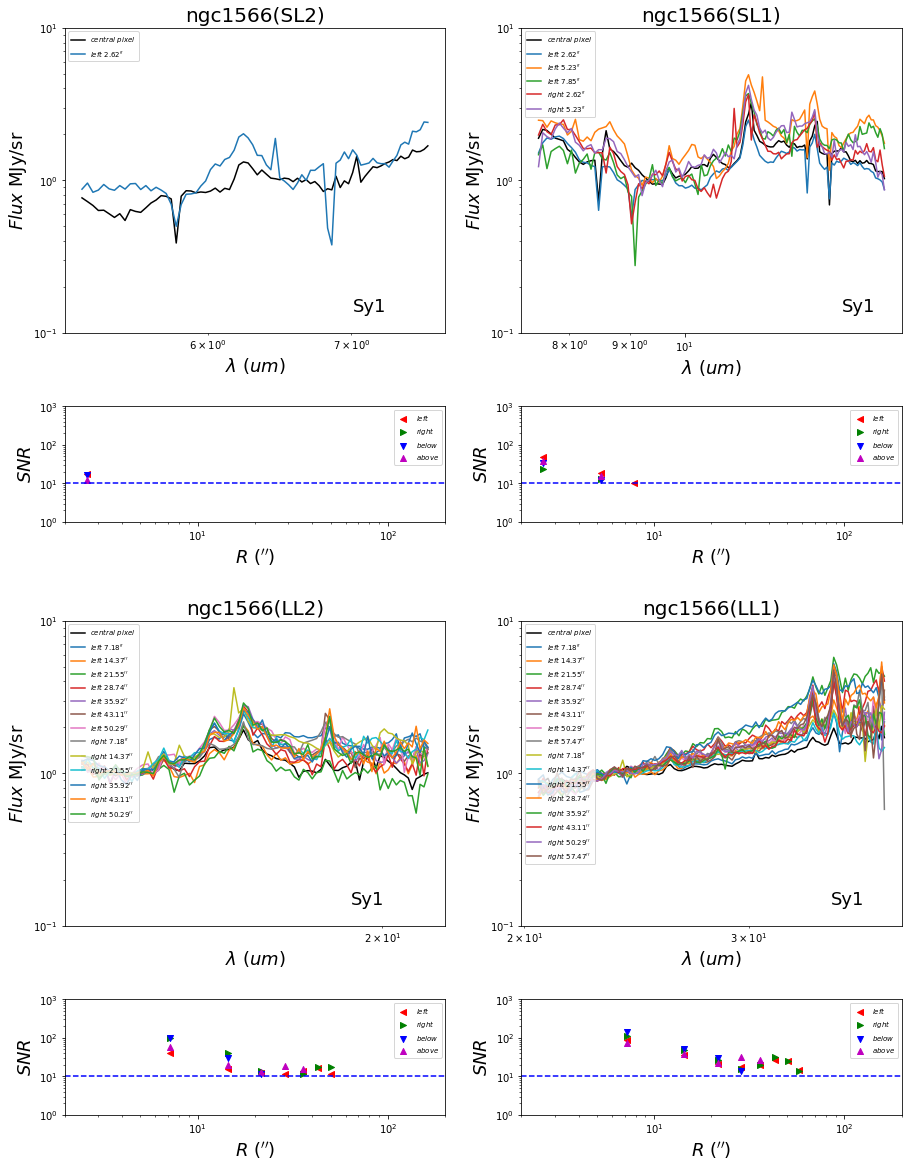

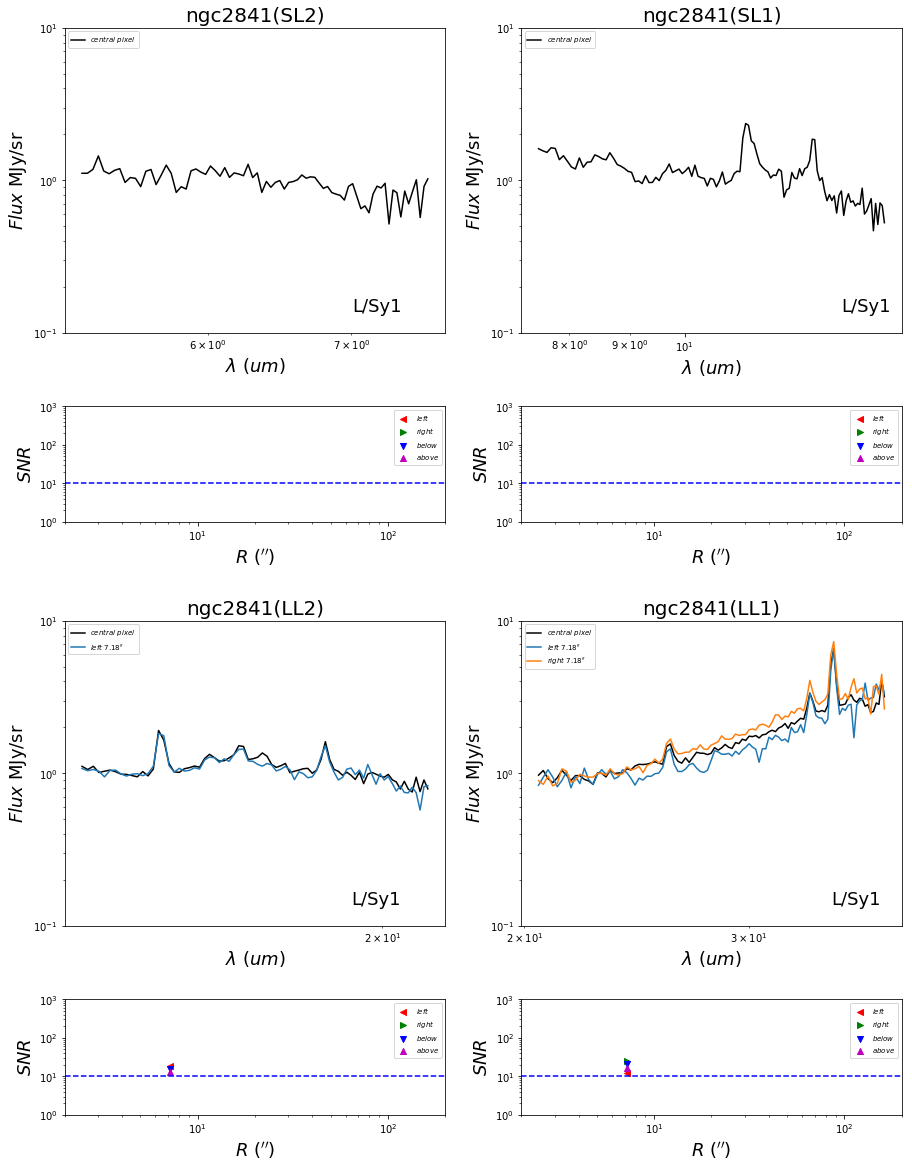

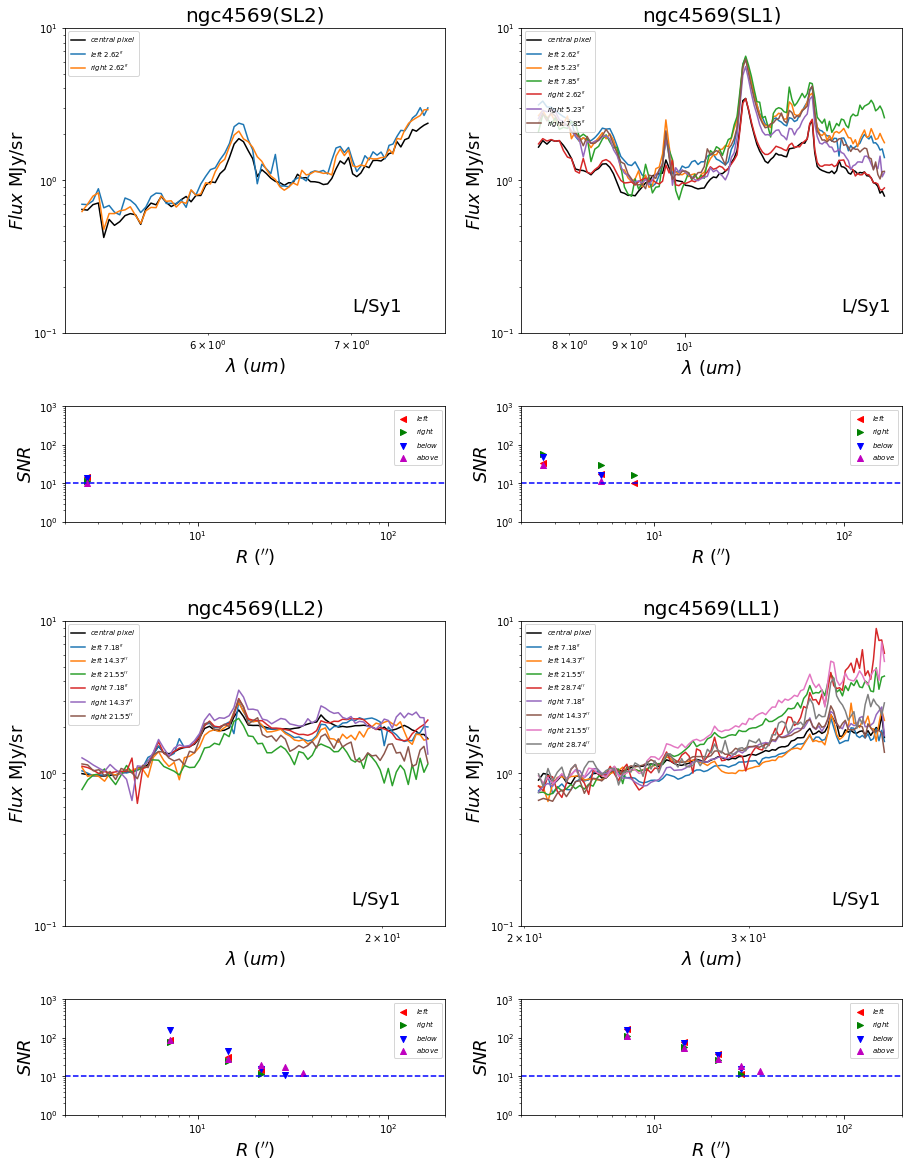

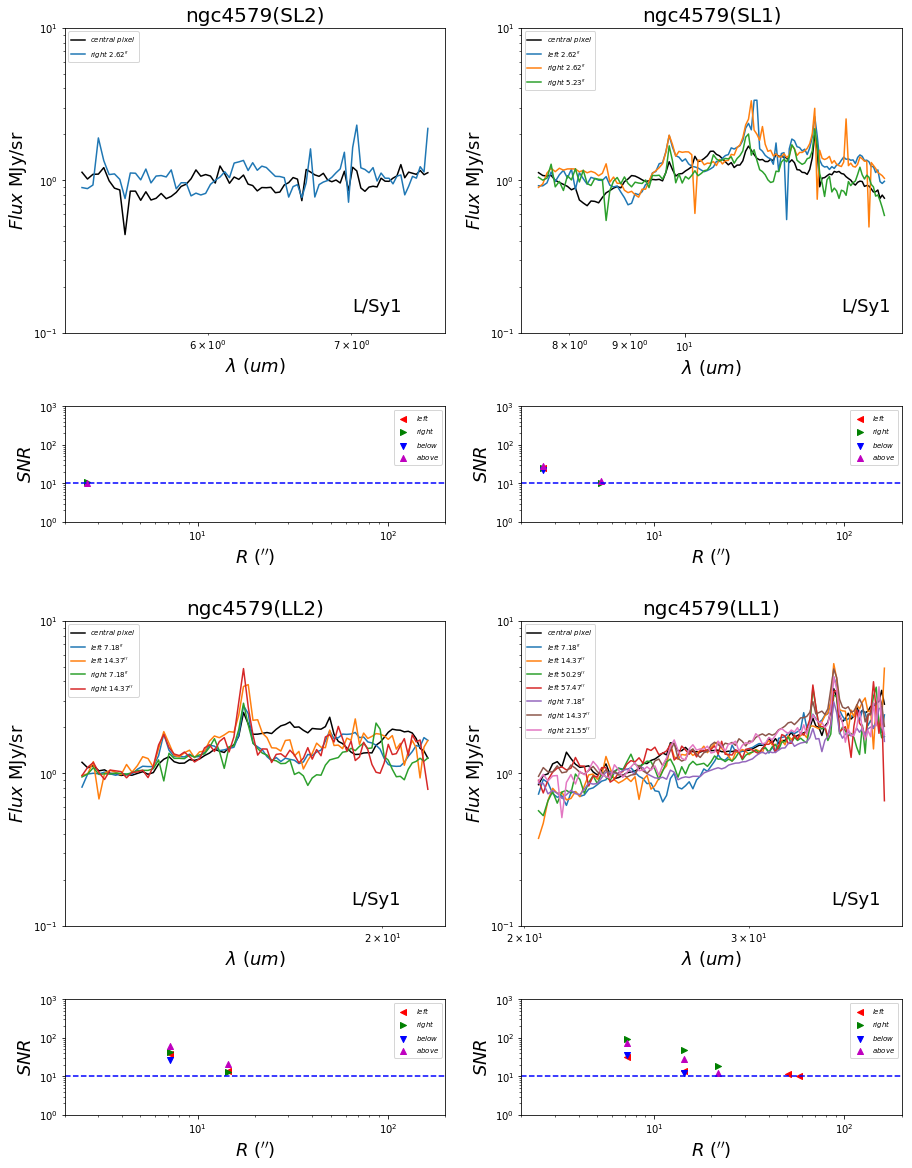

In [9]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from astropy.io import fits


data_mode = ['_DR5_SL2_cube','_DR5_SL1_cube','_DR5_LL2_cube','_DR5_LL1_cube']
data_norm = [[6.5, 6.7], [9.2, 9.5], [14.5, 15.2], [23, 24]]
gal_list = open('../subsam_Sy.txt','r')
gal_name = gal_list.readlines()
#gal_name = ['ngc4826', 'ngc4569', 'ngc3351', 'ngc4736']

for name in gal_name:
    f = plt.figure(figsize=[15,20])
    gs0 = gridspec.GridSpec(2, 2)
    for num in range(0,len(data_mode)):

        gs00 = gridspec.GridSpecFromSubplotSpec(8, 3, subplot_spec=gs0[num//2,num%2])

        file_n = '../../Cube/'+name.split('_')[0]+'/'+name.split('_')[0]+data_mode[num].strip()+'.fits'
        file_u = '../../Cube/'+name.split('_')[0]+'/'+name.split('_')[0]+data_mode[num].strip()+'_unc.fits'
        if(os.path.isfile(file_n)):
            cube = fits.open(file_n)
            cube_u = fits.open(file_u)
#            cube.info()

# Re-order FLUX, IVAR, and MASK arrays from (wavelength, DEC, RA) to (RA, DEC, wavelength).
            flux = np.transpose(cube['PRIMARY'].data, axes=(2, 1, 0))
            flux_u = np.transpose(cube_u['PRIMARY'].data, axes=(2, 1, 0))
            flux_sum = flux.sum(axis=2)
            flux_sum[np.isnan(flux_sum)] = 0
            mm = flux_sum.shape
#    nn = np.argmax(flux_sum)
#    xx = (nn)//mm[1]
#    yy = (nn)%mm[1]
            xx, yy = np.where(flux_sum == np.max(flux_sum))
#    print(flux_sum[xx,yy],np.max(flux_sum))
#    print(xx,yy)
   
            wave = cube['WCS-TAB'].data[0][0]
            wave.resize(len(wave))

            flux_header = cube['PRIMARY'].header
    
#    plt.figure(figsize=[10,5])

#            nn = np.min([xx[0], mm[0]-xx[0], yy[0], mm[1]-yy[0]])
#            nn = nn-1
#    print(n)
            mask1 = wave>data_norm[num][0]
            mask2 = wave<data_norm[num][1]
            mask = mask1*mask2
            fmean_c = (flux[xx[0]][yy[0]][mask]).mean()
            flux_max = flux[xx[0]][yy[0]]/fmean_c
            flux_max_u = flux_u[xx[0]][yy[0]]

            ax1 = plt.Subplot(f, gs00[:-3, :])
            ax1.plot(wave, flux_max, 'k', label='$central\ pixel$')
            fluc_u = [[],[],[],[]]
            raddd = [[],[],[],[]]
            
            for i in range(xx[0]-1,-1,-1):
                flux_row = flux[i][yy[0]]
                masss = flux_u[i][yy[0]]!=0
                snr = (flux_row[masss]/flux_u[i][yy[0]][masss]).mean()
                if(np.isnan(flux_row).sum()<1 and snr>10):
                    fmean = (flux_row[mask]).mean()
                    flux_row = flux_row/fmean
                    par = (xx[0]-i)*np.sqrt(flux_header['CDELT1']**2 + flux_header['CDELT2']**2)*3600
                    ax1.plot(wave, flux_row, label='$left\ $'+str(round(par,2))+'$\'\'$')
                    fluc_u[0].append(snr)
                    raddd[0].append(par)

            for i in range(xx[0]+1,mm[0],1):
                flux_row = flux[i][yy[0]]
                masss = flux_u[i][yy[0]]!=0
                snr = (flux_row[masss]/flux_u[i][yy[0]][masss]).mean()
                if(np.isnan(flux_row).sum()<1 and snr>10):
                    fmean = (flux_row[mask]).mean()
                    flux_row = flux_row/fmean
                    par = (i-xx[0])*np.sqrt(flux_header['CDELT1']**2 + flux_header['CDELT2']**2)*3600
                    ax1.plot(wave, flux_row, label='$right\ $'+str(round(par,2))+'$\'\'$')
                    fluc_u[1].append(snr)
                    raddd[1].append(par)

            for j in range(yy[0]-1,-1,-1):
                flux_col = flux[xx[0]][j]
                masss = flux_u[xx[0]][j]!=0
                snr = (flux_col[masss]/flux_u[xx[0]][j][masss]).mean()
                if(np.isnan(flux_col).sum()<1 and snr>10):
                    fmean = (flux_col[mask]).mean()
                    flux_col = flux_col/fmean
                    par = (yy[0]-j)*np.sqrt(flux_header['CDELT1']**2 + flux_header['CDELT2']**2)*3600
#                    ax1.plot(wave, flux_col, label='$below\ $'+str(round(par,2))+'$\'\'$')
                    fluc_u[2].append(snr)
                    raddd[2].append(par)

            for j in range(yy[0]+1,mm[1],1):
                flux_col = flux[xx[0]][j]
                masss = flux_u[xx[0]][j]!=0
                snr = (flux_col[masss]/flux_u[xx[0]][j][masss]).mean()
                if(np.isnan(flux_col).sum()<1 and snr>10):
                    fmean = (flux_col[mask]).mean()
                    flux_col = flux_col/fmean
                    par = (j-yy[0])*np.sqrt(flux_header['CDELT1']**2 + flux_header['CDELT2']**2)*3600
#                    ax1.plot(wave, flux_col, label='$above\ $'+str(round(par,2))+'$\'\'$')
                    fluc_u[3].append(snr)
                    raddd[3].append(par)

            fluc_u = np.array(fluc_u)
            raddd = np.array(raddd)
#            plt.setp(ax1.get_xticklabels(), visible=False)
            f.add_subplot(ax1)

#    for i in range(0,4):

        ax2 = plt.Subplot(f, gs00[-2:, :])#, sharex=ax1)
        ax2.scatter(raddd[0], fluc_u[0], color='r', marker='<', label='$left$')
        ax2.scatter(raddd[1], fluc_u[1], color='g', marker='>', label='$right$')
        ax2.scatter(raddd[2], fluc_u[2], color='b', marker='v', label='$below$')    
        ax2.scatter(raddd[3], fluc_u[3], color='m', marker='^', label='$above$')
#        ax2.axhline(3, color='r', ls='--')
        ax2.axhline(10, color='b', ls='--')
        f.add_subplot(ax2)
        ax1.set_xscale('log')
        ax1.set_yscale('log')
        ax2.set_xscale('log')
        ax2.set_yscale('log')
#        ax1.set_xlim([5*10**0,5*10**1])
        ax1.set_ylim([10**-1,10**1])
        ax2.set_xlim([2,2*10**2])
        ax2.set_ylim([1,10**3])
        ax1.set_xlabel('$\lambda\ (um)$', fontsize=18)
        ax2.set_xlabel('$R\ (\'\')$', fontsize=18)
        ax1.set_ylabel('$Flux\ $'+flux_header['BUNIT'], fontsize=18)
        ax2.set_ylabel('$SNR$', fontsize=18)
        ax1.set_title(name.split('_')[0]+'('+data_mode[num].split('_')[2]+')', fontsize=20)
        ax1.text(wave[-20], 0.1, name.split('_')[1], fontsize=18)
        ax1.legend(loc=2, fontsize='x-small')
        ax2.legend(loc=1, fontsize='x-small')
